In [111]:
import json

resultsCNN = {}
resultsML = {}
resultsDL = {}


with open('resultsCNNAllcopy.json') as json_file:
    resultsCNN = json.load(json_file)

with open('resultsDeepLearningC.json') as json_file:
    resultsDL = json.load(json_file)

with open('resultsMachineLearning.json') as json_file:
    resultsML = json.load(json_file)

print(json.dumps(resultsCNN, indent=1))
print(json.dumps(resultsDL, indent=1))
print(json.dumps(resultsML, indent=1))



{
 "Experiment": {
  "Raw": {
   "Fruits": {
    "Blueberries": {
     "Model": {
      "CNN": {
       "Epochs": {
        "100": {
         "r2": -0.004041072212986885
        },
        "300": {
         "r2": -0.28635505761112245
        }
       }
      },
      "DenseNet": {
       "Epochs": {
        "100": {
         "r2": -0.44493061337426054
        },
        "300": {
         "r2": -0.9744979839520378
        }
       }
      },
      "MobileNet": {
       "Epochs": {
        "100": {
         "r2": -0.5500927296410199
        },
        "300": {
         "r2": -2.0988388365925834
        }
       }
      }
     }
    },
    "Raspberries": {
     "Model": {
      "CNN": {
       "Epochs": {
        "100": {
         "r2": -0.007139206571461276
        },
        "300": {
         "r2": -0.004507288967530609
        }
       }
      },
      "DenseNet": {
       "Epochs": {
        "100": {
         "r2": -0.14746271950135226
        },
        "300": {
         "r2": -0.363

In [123]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap(results_dict):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    loss_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                for model_name, model_data in dataset_data.items():
                    for epoch, epoch_data in model_data.items():
                        r2_data.append({
                            'experiment': experiment,
                            'test_name': test_name,
                            'dataset_name': dataset_name,
                            'model_name': model_name,
                            'epoch': epoch,
                            'r2': epoch_data['r2']
                        })

                        loss_data.append({
                            'experiment': experiment,
                            'test_name': test_name,
                            'dataset_name': dataset_name,
                            'model_name': model_name,
                            'epoch': epoch,
                            'loss': epoch_data['loss']
                        })
    r2_df = pd.DataFrame(r2_data)
    #loss_df = pd.DataFrame(loss_data)



    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmapth
    sns.set(font_scale=1.2)
    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'})
    ax.set_title("R2 Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


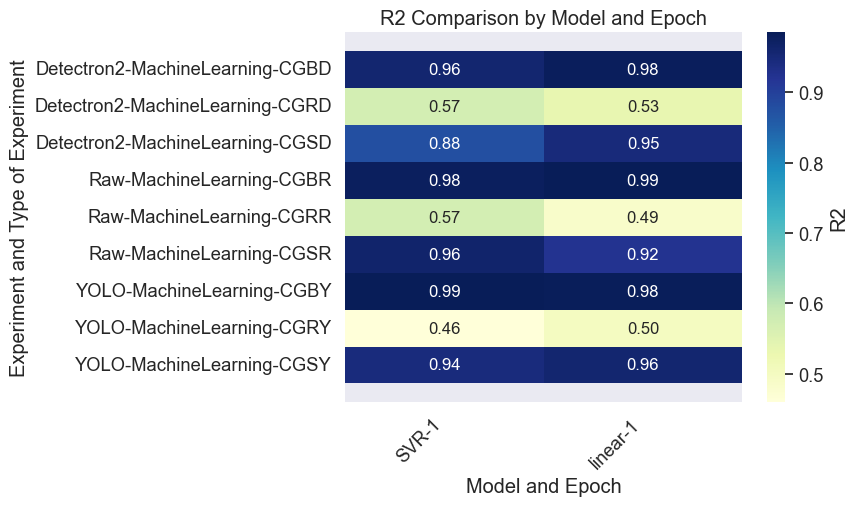

In [119]:
plot_r2_heatmap(resultsML)


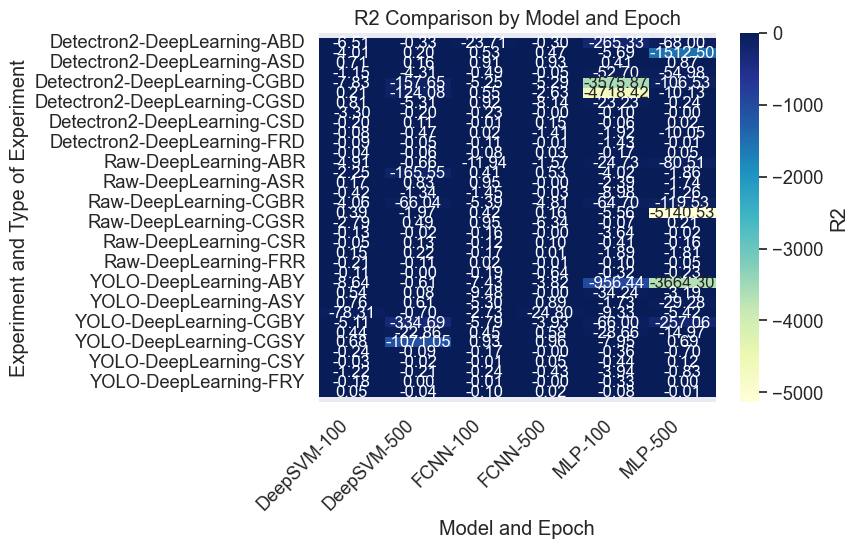

In [124]:
plot_r2_heatmap(resultsDL)


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

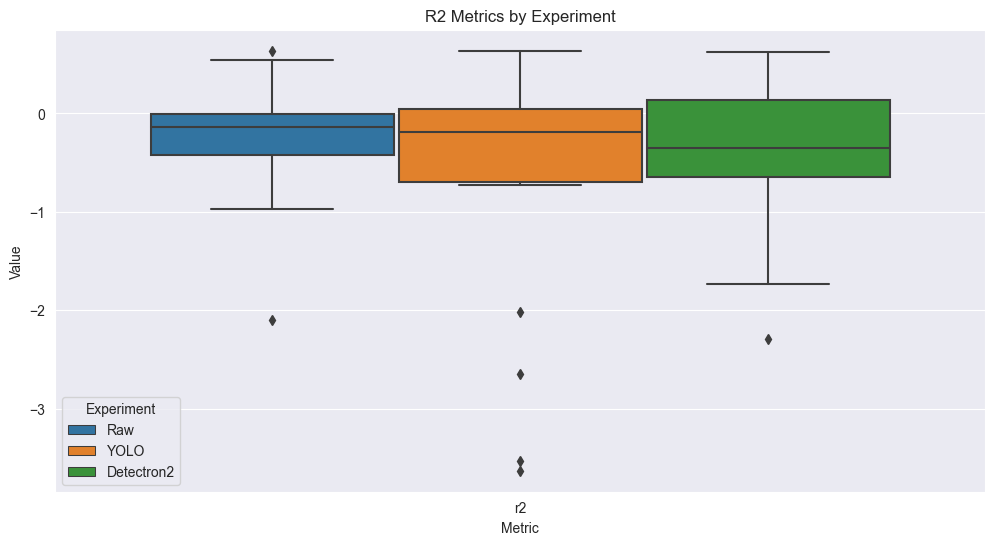

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
edgecolors=None
data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Experiment", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Experiment")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

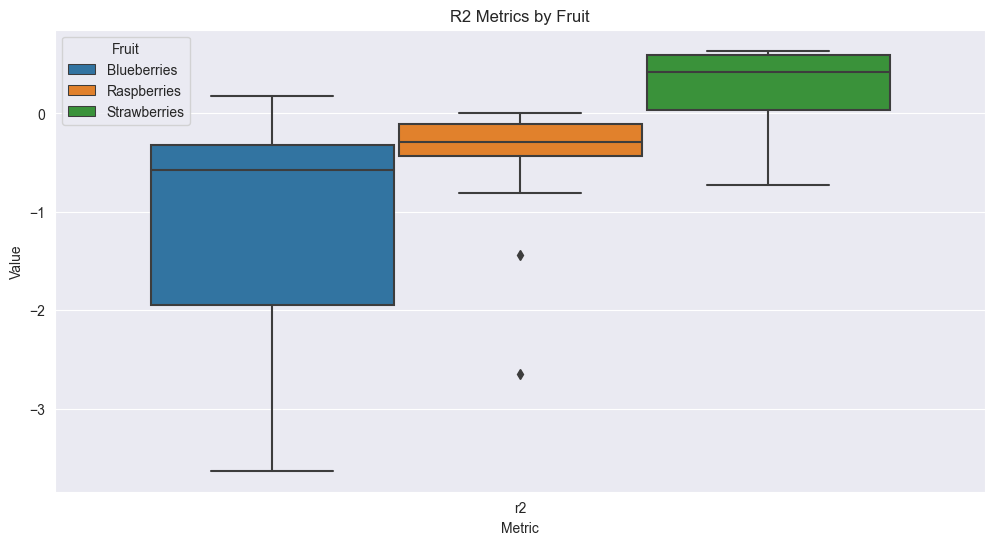

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Fruit", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Fruit")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

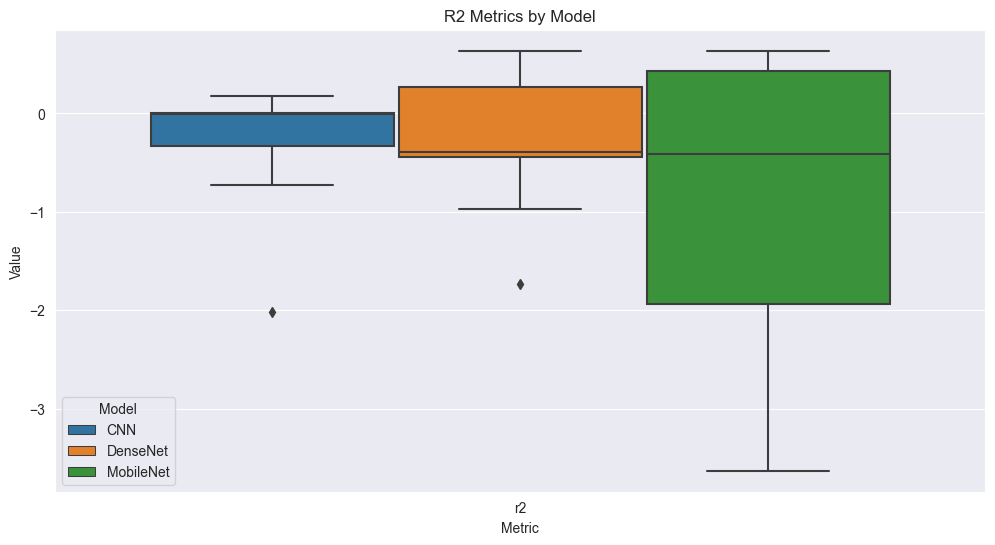

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])


plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
#swarmplot = sns.swarmplot(x="Model", y="Value", hue="Experiment", data=df, dodge=True, color=".25", ax=boxplot)


plt.title("R2 Metrics by Model")
plt.show()


{'Experiment': {'Raw': {'Fruits': {'Blueberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.004041072212986885}, '300': {'r2': -0.28635505761112245}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.44493061337426054}, '300': {'r2': -0.9744979839520378}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.5500927296410199}, '300': {'r2': -2.0988388365925834}}}}}, 'Raspberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.007139206571461276}, '300': {'r2': -0.004507288967530609}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.14746271950135226}, '300': {'r2': -0.3631432992968082}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.8085655605885449}, '300': {'r2': -0.127935126939972}}}}}, 'Strawberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.008424935786062182}, '300': {'r2': -0.3435609713584966}}}, 'DenseNet': {'Epochs': {'100': {'r2': 0.5412729376409295}, '300': {'r2': 0.2824198614051018}}}, 'MobileNet': {'Epochs': {'100': {'r2': 0.6313476882820155}, '300': {'r2': 0.4424399524643087}}}}}}}, 'Y

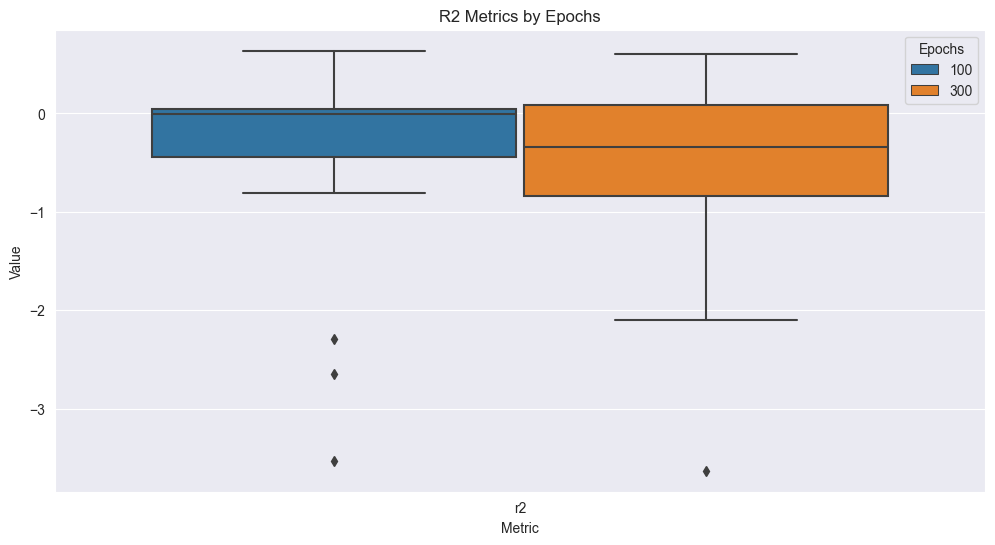

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

print(data)

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Epochs", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


In [6]:
print(resultsCNN)

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 

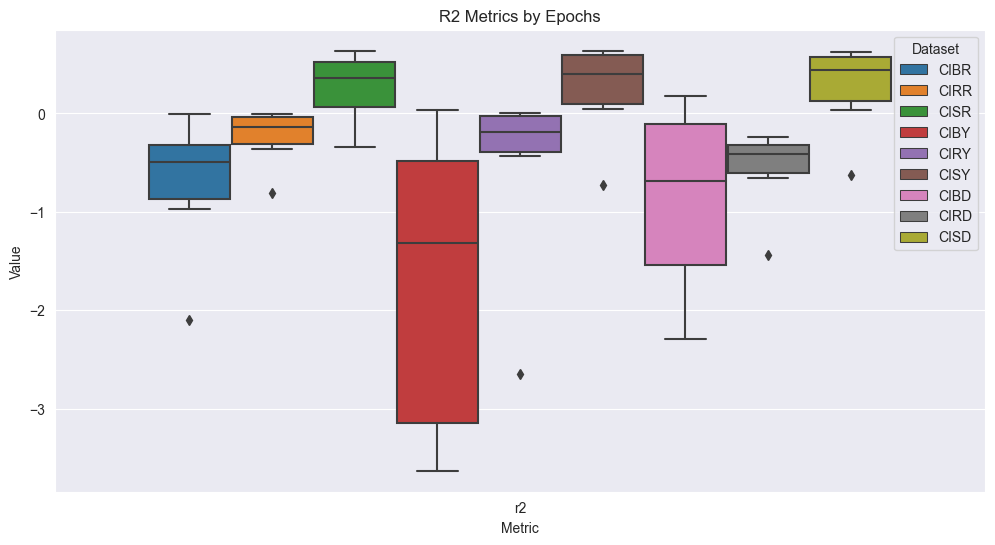

In [106]:
diction = {}

with open('resultsCNNAll.json') as json_file:
    diction = json.load(json_file)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = diction

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

print(data)

flat_data = list(flatten_json(data))

print(flat_data)
df = pd.DataFrame(flat_data, columns=["Experiment", "" ,"Dataset","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Dataset", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


{'Raw': {'DeepLearning': {'CGBR': {'MLP': {'100': {'r2': -64.701839859492, 'loss': 18.549575805664062, 'mse': 18.549575805664062, 'mae': 4.2672224044799805, 'rmse': 4.30692195892334}, '500': {'r2': -119.53302798603754, 'loss': 85.44715881347656, 'mse': 85.44715881347656, 'mae': 9.205338478088379, 'rmse': 9.243762969970703}}, 'FCNN': {'100': {'r2': -5.38604791020252, 'loss': 2.576350450515747, 'mse': 2.576350450515747, 'mae': 1.3141248226165771, 'rmse': 1.6051013469696045}, '500': {'r2': -4.810571955260061, 'loss': 2.7025272846221924, 'mse': 2.7025272846221924, 'mae': 1.357565999031067, 'rmse': 1.6439365148544312}}, 'DeepSVM': {'100': {'r2': -4.055664748611606, 'loss': 2.6975085735321045, 'mse': 2.6625924110412598, 'mae': 1.2837483882904053, 'rmse': 1.6317452192306519}, '500': {'r2': -66.04184856391224, 'loss': 23.51694679260254, 'mse': 23.481536865234375, 'mae': 4.821601867675781, 'rmse': 4.845775127410889}}}, 'FBR': {'MLP': {'100': {'r2': -1.893789621843018, 'loss': 1.2066375017166138

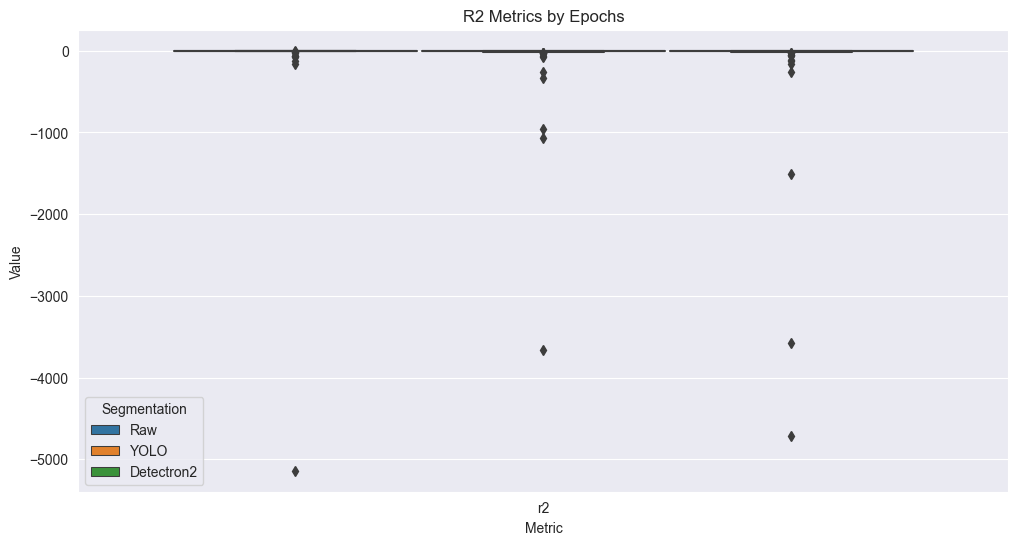

In [110]:
deeplearningresults = {}

with open('resultsDeepLearningC.json') as json_file:
    deeplearningresults = json.load(json_file)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = deeplearningresults

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

print(data)

flat_data = list(flatten_json(data))

print(flat_data)
df = pd.DataFrame(flat_data, columns=["Segmentation", "" ,"Dataset","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Segmentation", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()
